In [3]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy
# import functools
# import json
# import math
# import pandas as pd
# import pennylane as qml
# import pennylane.numpy as np
# import scipy

#### Quantum Fourier Challenge

In [53]:
import pennylane
from pennylane.fourier import coefficients, circuit_spectrum
def fourier_squared_distance(list_of_coeffs, param_list):
    """
    Returns the squared l2-distance in Fourier space between a function
    characterized by its Fourier coefficients and the output of the
    quantum model

    Args:
        list_of coeffs (list(float)): A list of seven coefficients
                                      corresponding to the Fourier
                                      coefficients of the function we
                                      want to approximate
        param_list (list(float)): A list of six parameters characterizing
                                  the angles in the trainable circuit.

    Returns: (float): Squared l2-distance between the given function
                      and the output of the quantum model
    """

    dev = qml.device("default.qubit", wires=3)

    # Feel free to define any helper functions, such as subcircuits, here.


    def entanglers(params):
        """ params = shape (3,1) array"""

        for i, param in enumerate(params): qml.RX(param, wires=[i])
        qml.CNOT(wires= [0,1])
        qml.CNOT(wires= [1,2])
        qml.CNOT(wires= [2,0])
    
    def encoder(x):
        for i in range(3):
            qml.RX(x, wires=[i])

    @qml.qnode(dev)
    def circuit(param_list, x):
        """This circuit returns the PauliZ expectation of
        the quantum model in the statement"""

        entanglers(param_list[:3])

        encoder(x)

        entanglers(param_list[3:])

        return qml.expval(qml.PauliZ(0))
    
    paramterized_circuit = lambda x : circuit(param_list, x)
    calc_coefficients = coefficients(paramterized_circuit,1,3)

    # calc_coefficients = [ calc_coefficients[3], calc_coefficients[4], calc_coefficients[5], calc_coefficients[6], calc_coefficients[0], calc_coefficients[1], calc_coefficients[2]]
    
    l2_norm = lambda c1,c2 :  np.sum([ np.absolute(c1[j] - c2[j])**2 for j in range(len(list_of_coeffs)) ])   

    # Write a function that calculates the squared l2-distance here
    print(list_of_coeffs)
    print(np.round(np.real(calc_coefficients), decimals= 3))
    
    return l2_norm(list_of_coeffs, calc_coefficients)


In [54]:
# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    output = fourier_squared_distance(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises:
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your calculated squared distance isn't quite right."

test_cases = [['[[-1.12422548e-01,  0.0, 9.47909940e-02, 0.0, 0.0, 9.47909940e-02, 0.0],[2,2,2,3,4,5]]', '0.0036766085933034303'], ['[[-2.51161988e-01, 0.0, 1.22546112e-01, 0.0, 0.0,  1.22546112e-01, 0.0],[1.1,0.3,0.4,0.6,0.8,0.9]]', '0.6538589174369286']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correc-t!")

Running test case 0 with input '[[-1.12422548e-01,  0.0, 9.47909940e-02, 0.0, 0.0, 9.47909940e-02, 0.0],[2,2,2,3,4,5]]'...
[-0.112422548, 0.0, 0.094790994, 0.0, 0.0, 0.094790994, 0.0]
[-0.112  0.     0.095 -0.    -0.     0.095  0.   ]
Correc-t!
Running test case 1 with input '[[-2.51161988e-01, 0.0, 1.22546112e-01, 0.0, 0.0,  1.22546112e-01, 0.0],[1.1,0.3,0.4,0.6,0.8,0.9]]'...
[-0.251161988, 0.0, 0.122546112, 0.0, 0.0, 0.122546112, 0.0]
[ 0.458 -0.    -0.03   0.     0.    -0.03  -0.   ]
Correc-t!


#### CNOT universality challenge

In [4]:
def hadamard(wire):
    qml.U3(np.pi, 0 ,np.pi, wires= [wire] )
    qml.U3(np.pi/2, np.pi, np.pi, wires= [wire])
    
    
    

def cz(wires):
    hadamard(wires[1])
    qml.CNOT(wires = wires)
    hadamard(wires[1])
    
def circuit():
    """
    Succession of gates that will generate the requested matrix.
    This function does not receive any arguments nor does it return any values.
    """

    qml.U3(np.pi,0,np.pi, wires= [0])
    cz([0,1])
    qml.U3(np.pi,0,np.pi, wires= [0])
    hadamard(2)
    

    

    # Put your solution here ...
    # You only have to put U3 or CNOT gates
    

In [5]:
np.set_printoptions(precision=3)
a = qml.matrix(circuit)
s = a()
s = np.real(s)
s[np.abs(s) < 0.00001] = 0
print(s)

[[ 0.707  0.707  0.     0.     0.     0.     0.     0.   ]
 [ 0.707 -0.707  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.707 -0.707  0.     0.     0.     0.   ]
 [ 0.     0.    -0.707  0.707  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.707  0.707  0.     0.   ]
 [ 0.     0.     0.     0.     0.707 -0.707  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.707  0.707]
 [ 0.     0.     0.     0.     0.     0.     0.707 -0.707]]


In [10]:
op = qml.RX(0.54, wires=0)
qml.matrix(op) 

array([[0.964+0.j   , 0.   -0.267j],
       [0.   -0.267j, 0.964+0.j   ]])

In [16]:
def circuitt():
    qml.RX(np.pi, wires=1)
    qml.PauliZ(wires=0)
matrix_fn = qml.matrix(circuitt)
# theta = np.pi / 4
matrix_fn()

array([[ 6.123234e-17+0.j,  0.000000e+00+0.j,  0.000000e+00-1.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j, -6.123234e-17+0.j,  0.000000e+00+0.j,
         0.000000e+00+1.j],
       [ 0.000000e+00-1.j,  0.000000e+00+0.j,  6.123234e-17+0.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j,  0.000000e+00+1.j,  0.000000e+00+0.j,
        -6.123234e-17+0.j]])

In [17]:
matrix_fn()

array([[ 6.123234e-17+0.j,  0.000000e+00+0.j,  0.000000e+00-1.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j, -6.123234e-17+0.j,  0.000000e+00+0.j,
         0.000000e+00+1.j],
       [ 0.000000e+00-1.j,  0.000000e+00+0.j,  6.123234e-17+0.j,
         0.000000e+00+0.j],
       [ 0.000000e+00+0.j,  0.000000e+00+1.j,  0.000000e+00+0.j,
        -6.123234e-17+0.j]])

In [25]:
b = 0.5
np.exp(1j*b)

(0.8775825618903728+0.479425538604203j)

In [18]:
qml.matrix(circuitt)

<function pennylane.transforms.op_transforms.op_transform._create_wrapper.<locals>.wrapper(*args, **kwargs)>

#### Universality 1

In [47]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

np.random.seed(1967)


def get_matrix(params):
    """
    Args:
        - params (array): The four parameters of the model.
    Returns:
        - (matrix): The associated matrix to these parameters.
    """

    alpha, beta, gamma, phi = params
    
    def circuit(): 
        qml.RX(alpha, wires=[0])
        qml.RX(beta, wires=[0])
        qml.RX(gamma, wires=[0])


    np.set_printoptions(precision=3)
    
    a = qml.matrix(circuit)  
    
    return a()*np.exp(phi*1j)

def error(U, params):
    """
    This function determines the similarity between your generated matrix and the target unitary.

    Args:
        - U (matrix): Goal matrix that we want to approach.
        - params (array): The four parameters of the model.

    Returns:
        - (float): Error associated with the quality of the solution.
    """

    matrix = get_matrix(params)

    diff = matrix - U

    # return np.tensor(np.real(qml.math.frobenius_inner_product(diff, diff), requires_grad= True))
    

def train_parameters(U):

    epochs = 1000
    lr = 0.01

    grad = qml.grad(error, argnum=1)
    params = np.random.rand(4) * np.pi

    for epoch in range(epochs):
        params -= lr * grad(U, params)
        print(error(U, params))

    return params



In [48]:

# These functions are responsible for testing the solution.

def run(test_case_input: str) -> str:
    matrix = json.loads(test_case_input)
    params = [float(p) for p in train_parameters(matrix)]
    return json.dumps(params)

def check(solution_output: str, expected_output: str) -> None:
    matrix1 = get_matrix(json.loads(solution_output))
    matrix2 = json.loads(expected_output)
    assert not np.allclose(get_matrix(np.random.rand(4)), get_matrix(np.random.rand(4)))
    assert np.allclose(matrix1, matrix2, atol=0.2)


test_cases = [['[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]]', '[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]]'], ['[[ 1,  0], [ 0, -1]]', '[[ 1,  0], [ 0, -1]]']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[[ 0.70710678,  0.70710678], [ 0.70710678, -0.70710678]]'...
-0.1396144873868338
-0.18548526856074377
-0.22548485485338587
-0.26031679533602003
-0.29062261129738576
-0.3169789845295591
-0.33989865554112797
-0.3598336828670504
-0.37718006022464334
-0.3922829795076762
-0.4054422577490687
-0.41691761936498895
-0.42693365010400575
-0.4356843261761375
-0.4433370803197806
-0.4500364038888597
-0.455907006576161
-0.46105656779577336
-0.46557811943700855
-0.46955210109835605
-0.4730481276931836
-0.47612650662560674
-0.47883953831370907
-0.48123263016555706
-0.4833452504833729
-0.485211745350523
-0.4868620384312098
-0.48832223081827963
-0.4896151156031996
-0.49076061969811596
-0.4917761835872903
-0.49267708809435073
-0.49347673589162505
-0.49418689431909824
-0.4948179050953736
-0.4953788656672162
-0.49587778623552914
-0.4963217258953462
-0.49671691081882174
-0.4970688369794324
-0.4973823595504891
-0.49766177080145496
-0.497910868052877
-0.49813301302752677
-0.4983

AssertionError: 

#### 2. Fourier

In [49]:
import functools
import json
import math
import pandas as pd
import pennylane as qml
import pennylane.numpy as np
import scipy

def quantum_model(n, train_params, x, model_type):
    """
    Builds an in-series or parallel quantum model according to the specifications in the problem statement, returning
    the expectation value on the first wire.

    Args: 
        n (int): The total number of encoding gates. Assumed to be smaller than,
                or equal to, the number of wires (3).
        train_params (list(float)): A list of length n + 1, which indicates the rotation parameter characterizing
                    the trainable circuit. If the circuit is parallel, only the first two parameters are used.
        x (float): A real number representing the input data point.
        model_type (str): A string that is "series" or "parallel", depending on the type of model.  

    Returns: 
        (float): The expectation value of Paentangler(train_params[i])uliZ measurements on the first wire.
    """ 
    
    num_wires=3

    dev = qml.device('default.qubit', wires = num_wires)

    # Write any helper functions, such as subcircuits you may use later, here.
    def entangler(parm):
        
        qml.Hadamard(wires=[0])
        qml.CRX(parm, wires=[0,1])
        qml.Hadamard(wires=[1])
        qml.CRX(parm, wires=[1,2])
        qml.Hadamard(wires=[2])
        qml.CRX(parm, wires=[2,0])
        qml.Barrier(wires=[0,1,2])

    @qml.qnode(dev)
    def circuit(n, train_params, x, model_type):
        if model_type == "parallel": ## https://arxiv.org/pdf/2107.12390.pdf
            # Put your code here #
            # for i in range(len(train_params)):
            entangler(train_params[0])
            for w in range(3): qml.RX(x, wires=[w])
            entangler(train_params[1])

        elif model_type == "series":
            # Put your code here #
            for i in range(n):
                entangler(train_params[i])
                qml.RX(x, wires=[0])
            entangler(train_params[-1])    
        
        
        # Return an expectation value
        return qml.expval(qml.PauliZ(0))

    # Finally, return a float, not a numpy tensor. You can do this using the .numpy() method!
    
    exp = circuit(n , train_params,x, model_type)
    
    return exp.numpy()


# These functions are responsible for testing the solution.


def run(test_case_input: str) -> str:

    ins = json.loads(test_case_input)
    print(ins)
    output = quantum_model(*ins)

    return str(output)

def check(solution_output: str, expected_output: str) -> None:
    """
    Compare solution with expected.

    Args:
            solution_output: The output from an evaluated solution. Will be
            the same type as returned.
            expected_output: The correct result for the test case.

    Raises: 
            ``AssertionError`` if the solution output is incorrect in any way.
    """

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, rtol=1e-2
    ), "Your circuit doesn't look quite right."


test_cases = [['[2,[0.4,0.8,1.0],1.2,"parallel"]', '0.977856732420062'], ['[3,[0.6,0.7,0.8,1.2],1.3,"series"]', '0.37048658401504975']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

In [27]:
num_wires=3

dev = qml.device('default.qubit', wires = num_wires)

# Write any helper functions, such as subcircuits you may use later, here.
def entangler(parm):
    qml.Barrier(wires=[0,1,2])
    qml.Hadamard(wires=[0])
    qml.CRX(parm, wires=[0,1])
    qml.Hadamard(wires=[1])
    qml.CRX(parm, wires=[1,2])
    qml.Hadamard(wires=[2])
    qml.CRX(parm, wires=[2,1])
    qml.Barrier(wires=[0,1,2])

@qml.qnode(dev)
def circuit(n, train_params, x, model_type):
    if model_type == "parallel": ## https://arxiv.org/pdf/2107.12390.pdf
        # Put your code here #
        # for i in range(len(train_params)):
        entangler(train_params[0])
        for w in range(3): qml.RX(x, wires=[w])
        entangler(train_params[1])

    elif model_type == "series":
        # Put your code here #
        for i in range(n):
            entangler(train_params[i])
            qml.RX(x, wires=[0])
        entangler(train_params[n])    
    
    
    # Return an expectation value
    qml.Barrier(wires=[0,1,2])
    return qml.expval(qml.PauliZ(0))

# Finally, return a float, not a numpy tensor. You can do this using the .numpy() method!

# exp = circuit(n , train_params,x, model_type)


(<Figure size 1512x288 with 1 Axes>, <Axes:>)

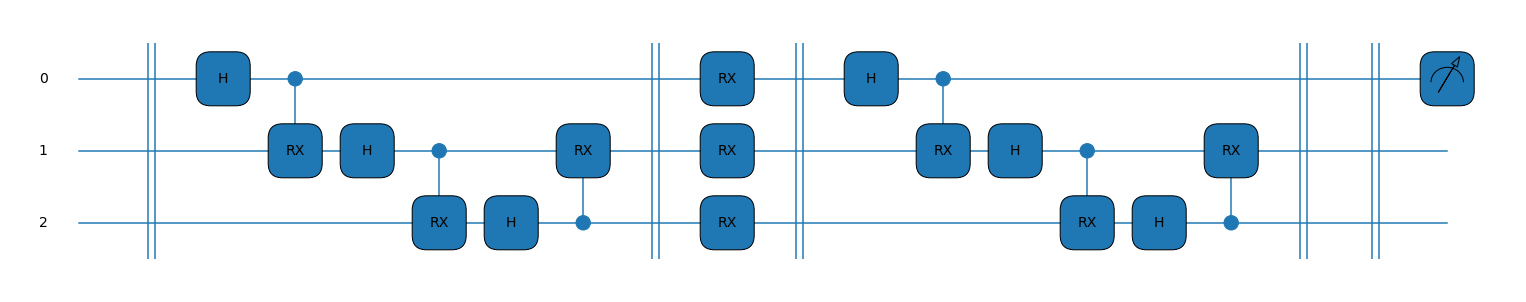

In [25]:
qml.draw_mpl(circuit)(2, [0.4, 0.8, 1.0], 1.2, 'parallel')

(<Figure size 2808x288 with 1 Axes>, <Axes:>)

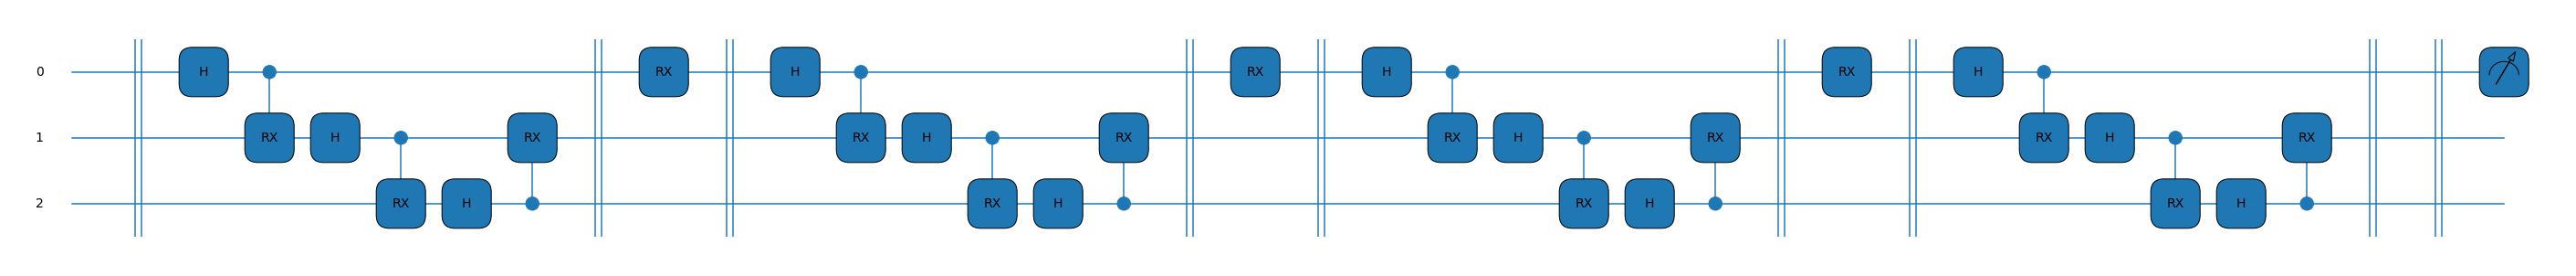

In [28]:
qml.draw_mpl(circuit)(3,[0.6,0.7,0.8,1.2],1.3,"series")